<a href="https://colab.research.google.com/github/sowmiya03/machine_learning/blob/master/digits_recongnition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Tensorflow 2.0
%tensorflow_version 2.x
import tensorflow as tf 

!pip install mitdeeplearning
import mitdeeplearning as mdl

import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm

# Check that we are using a GPU, if not switch runtimes
#   using Runtime > Change Runtime Type > GPU
assert len(tf.config.list_physical_devices('GPU')) > 0

     |████████████████████████████████| 2.1MB 51kB/s 
  Created wheel for mitdeeplearning: filename=mitdeeplearning-0.1.2-cp36-none-any.whl size=2114586 sha256=11fdcf17a7a8883cb29f39c902e8b4e2b99486cb23c0d2ae25547b3ede4f87be
  Stored in directory: /root/.cache/pip/wheels/27/e1/73/5f01c787621d8a3c857f59876c79e304b9b64db9ff5bd61b74
Successfully built mitdeeplearning


In [ ]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = (np.expand_dims(train_images, axis=-1)/255.).astype(np.float32)
train_labels = (train_labels).astype(np.int64)
test_images = (np.expand_dims(test_images, axis=-1)/255.).astype(np.float32)
test_labels = (test_labels).astype(np.int64)

11493376/11490434 [==============================] - 1s 0us/step


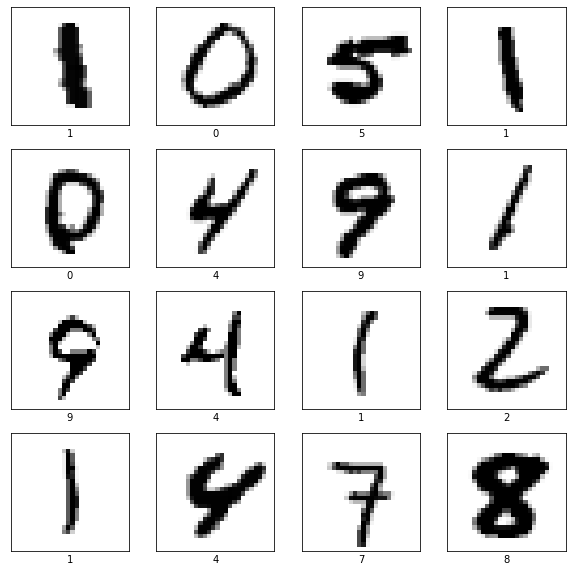

In [ ]:
plt.figure(figsize=(10,10))
random_inds = np.random.choice(60000,16)
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(train_images[image_ind]), cmap=plt.cm.binary)
    plt.xlabel(train_labels[image_ind])

In [ ]:
from keras import Sequential
from keras.layers import Flatten,Dense
model=Sequential()
model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dense(10,activation="softmax"))

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics="accuracy")

In [ ]:
BATCH_SIZE =64
EPOCHS = 5

model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)

In [ ]:
test_loss, test_acc = model.evaluate(test_images,test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0840 - accuracy: 0.9742
Test accuracy: 0.9742000102996826


In [ ]:
from keras.layers import Conv2D,MaxPool2D
model=Sequential()
model.add(Conv2D(64, kernel_size =5,activation=tf.nn.relu))
model.add(MaxPool2D(2))
model.add(Conv2D(40,kernel_size=3,activation=tf.nn.relu))
model.add(MaxPool2D(2))
model.add(Flatten())
model.add(Dense(10,activation="softmax"))

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')

In [ ]:
model.fit(train_images,train_labels,batch_size=BATCH_SIZE,epochs=EPOCHS)

Epoch 1/5
938/938 [==============================] - 6s 6ms/step - loss: 0.1836 - accuracy: 0.9459
Epoch 2/5
938/938 [==============================] - 5s 6ms/step - loss: 0.0543 - accuracy: 0.9837
Epoch 3/5
938/938 [==============================] - 5s 6ms/step - loss: 0.0411 - accuracy: 0.9872
Epoch 4/5
938/938 [==============================] - 5s 6ms/step - loss: 0.0322 - accuracy: 0.9898
Epoch 5/5
938/938 [==============================] - 5s 6ms/step - loss: 0.0254 - accuracy: 0.9924


In [ ]:
test_loss, test_acc = model.evaluate(test_images,test_labels)
print("accuracy:",test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0288 - accuracy: 0.9894
accuracy: 0.9894000291824341


In [ ]:
predictions = model.predict(test_images)

In [ ]:
predictions[0]

array([3.5093792e-10, 3.6745024e-10, 2.1121471e-06, 3.9992237e-06,
       2.6619858e-13, 7.6789880e-10, 8.1509676e-17, 9.9999309e-01,
       1.8087432e-09, 8.0050557e-07], dtype=float32)

Label of this digit is: 7


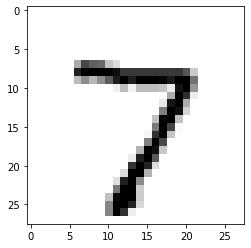

In [ ]:
print("Label of this digit is:", test_labels[0])
plt.imshow(test_images[0,:,:,0], cmap=plt.cm.binary)

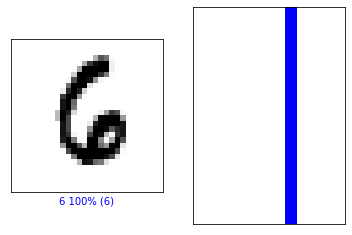

In [ ]:
#@title Change the slider to look at the model's predictions! { run: "auto" }

image_index = 39 #@param {type:"slider", min:0, max:100, step:1}
plt.subplot(1,2,1)
mdl.lab2.plot_image_prediction(image_index, predictions, test_labels, test_images)
plt.subplot(1,2,2)
mdl.lab2.plot_value_prediction(image_index, predictions,  test_labels)